# <b>Project #1 - Exploratory data analysis</b>

## <b>Import used packages</b>

In [480]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from datetime import date, datetime
import re

## <b>Loading data from - in our case it is a csv file</b>

In [481]:
df_full = pd.read_csv('./googleplaystore.csv', sep=',')

## <b>Let's take a look at the basic dataset information</b>

### <b>Dataset columns?</b>
- App: Application Name
- Category: Category the app belongs to
- Rating: Overall user rating of the app
- Reviews: Number of user reviews for the app
- Size: Size of the app
- Installs: Number of user downloads/installs for the app
- Type: Paid or Free
- Price: Price of the app
- Content Rating: Age group the app is targeted at
- Genres: An app can belong to multiple genres
- Last updated: Date when the app was last updated on Play Store
- Current Ver: Current version of the app available on Play Store
- Andoird Ver: Min. required Android version


### <b>Dataset shape?</b>
- 13 cols, 10841 rows


### <b>Dataset cols names with datatypes?</b>

In [482]:
df_full.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### <b>It would be better to edit and convert columns to correct datatypes</b>
1. Price has dollar sign before value, it would be better to remove dollar sign and convert into numeric value
2. Last Updated is object, maybe it will be better to use datetime
3. Reviews should be integer
4. Created new col Size Numeric, M and k units removed and k calculated to M 
5. Let's create a new column with the min required android version rounded to an integer
6. Let's create a new column with the current version of app rounded to an integer
7. Let's create Int number from installs 

In [483]:
# there was a one incorrect record, cells was wrongly sorted
df_full = df_full.loc[df_full['App'] !=
                      'Life Made WI-Fi Touchscreen Photo Frame']

# -------- 1. --------
df_full['Price'] = df_full['Price'].str.replace(
    '$', '', regex=True).astype(float)

# -------- 2. --------
df_full['Last Updated'] = pd.to_datetime(
    df_full['Last Updated'], format='%B %d, %Y')

# -------- 3. --------
df_full['Reviews'] = pd.to_numeric(df_full["Reviews"])

# -------- 4. --------
df_full['Size Numeric'] = df_full['Size'].apply(lambda x: round(
    float(x.replace('k', '')) / 1024, 1) if 'k' in x else x.replace('M', ''))
df_full['Size Numeric'] = df_full['Size Numeric'].loc[df_full['Size Numeric']
                                                      != 'Varies with device'].astype(float)

# -------- 5. --------
df_full['Android Ver Rounded'] = df_full.loc[df_full['Android Ver']
                                             != 'Varies with device']['Android Ver']
df_full['Android Ver Rounded'] = df_full['Android Ver Rounded'].apply(lambda x: re.search(
    '[0-9]+', str(x)).group() if re.search('[0-9]+', str(x)) else 0).astype(int)

# -------- 6. --------
df_full['Current Ver Rounded'] = df_full.loc[df_full['Current Ver']
                                             != 'Varies with device']['Current Ver']
df_full['Current Ver Rounded'] = df_full['Current Ver Rounded'].apply(lambda x: re.search(
    '[0-9]+', str(x)).group()[0] if re.search('[0-9]+', str(x)) else 0).astype(int)

# -------- 7. --------
df_full['Installs Numeric'] = df_full['Installs'].apply(lambda x: str(x).replace('+', '').replace(',', '')).astype(int)

### <b>Are there any missing values?</b>
- Mostly not, a few columns have negligibly few missing values
- Rating has cca 1/11 of records empty
- Size Numeric empty values are records with value equals to 'Varies with device'

In [484]:
df_full.isna().sum().sort_values()

App                       0
Android Ver Rounded       0
Last Updated              0
Genres                    0
Current Ver Rounded       0
Price                     0
Content Rating            0
Installs                  0
Size                      0
Reviews                   0
Category                  0
Installs Numeric          0
Type                      1
Android Ver               2
Current Ver               8
Rating                 1474
Size Numeric           1695
dtype: int64

### <b>Removing records without value</b>
- Since the dataset is large enough and the data are not dependent on each other, I choose the option that deletes records without value

In [503]:
df_full = df_full.dropna()

## <b>Now let's write down a few unknowns we wanna find out
1. Count of apps for each category
2. Count of apps for each Content rating (Age group the app is targeted at)
3. Count of apps for Installs number category
4. Which Content rating has the highest rating?
5. Are all applications correctly maintened?
6. How are the apps mostly rated, free/paid?
7. Relation between category and price
8. Let's check correlation between numeric values
9. Does Category affects app size?
10. Relation between Rating and count of Reviews
11. Relation between Category and Content Rating
12. Relation between min supported version and last updated year
13. Does have minimum supported os version affects size of app?
14. Relation between current version of app and rating
15. Relation between Rating and number of Installs
16. Relation between Reviews and Installs
<b>17. Let's check some max/min values</b>


### <b>1. Count of apps for each category</b>
- Category named family has the highest number of applications (almost 1750)
- The games category has the second highest number of applications, third is tools category
- The other categories have significantly fewer applications than the 3 mentioned above
- Beauty, Events, Parenting are the categories with the lowest frequency 


<AxesSubplot: xlabel='Count of apps', ylabel='Category'>

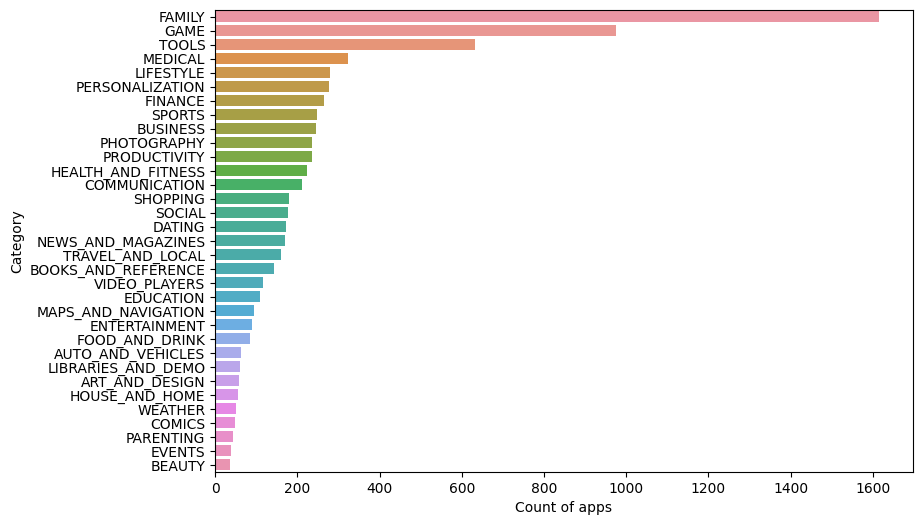

In [534]:
df_one = df_full.groupby('Category').App.count().sort_values(ascending=False).reset_index(name="Count of apps")
fig = plt.figure(figsize=(9, 6))

sns.barplot(data=df_one, x='Count of apps', y='Category')

### <b>2. Count of apps for each Content rating (Age group the app is targeted at)</b>
- We can see that applications are mostly targeted at Everyone, age doesn't matter
- Second highest number has Teen Content Rating
- Everyone 10+ and Mature 17+ Content Ratings have similar number of applications
- 18+ has only 3 apps and Unrated 1

    Content Rating  Count of apps
0  Adults only 18+              2
1         Everyone           6166
2     Everyone 10+            318
3       Mature 17+            368
4             Teen            868
5          Unrated              1


<AxesSubplot: xlabel='Content Rating', ylabel='Count of apps'>

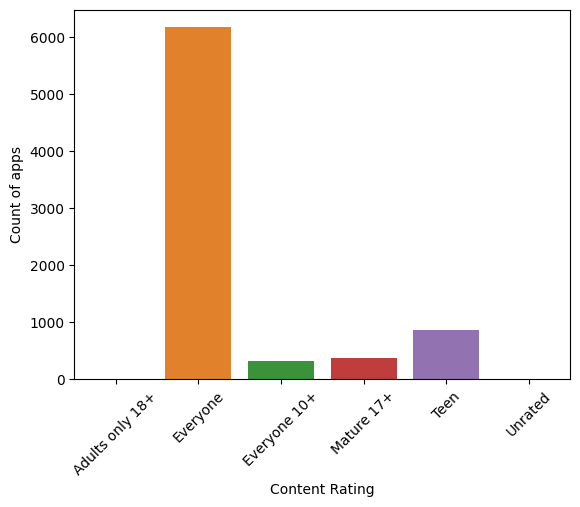

In [487]:
df_three = df_full.groupby('Content Rating').App.count().reset_index(name="Count of apps")

print(df_three)

plt.xticks(rotation=45)
sns.barplot(data=df_three, y='Count of apps', x='Content Rating')

### <b>3. Count of apps for Installs number category</b>
- Apps most often have 1,000,000+ installs
- 1,000,000,000+ installs have only few apps, cca 50




<AxesSubplot: xlabel='Count of apps', ylabel='Installs'>

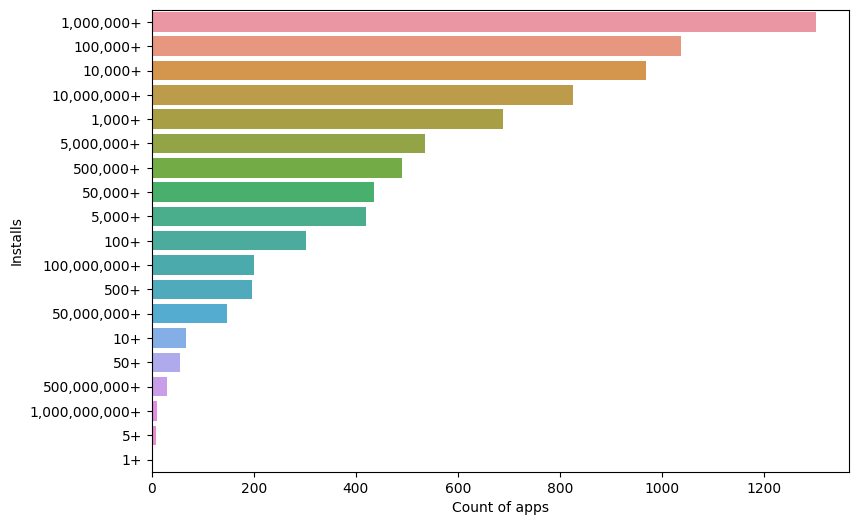

In [488]:
df_three = df_full.groupby('Installs').App.count().sort_values(ascending=False).reset_index(name="Count of apps")
fig = plt.figure(figsize=(9, 6))

sns.barplot(data=df_three, x='Count of apps', y='Installs')

### <b>4. Which Content rating has the highest rating?</b>
- it can be seen that apps for everyone the most dispersed rating
- apps for everyone are the only Content Rating which contains rating under 3.0 points

<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

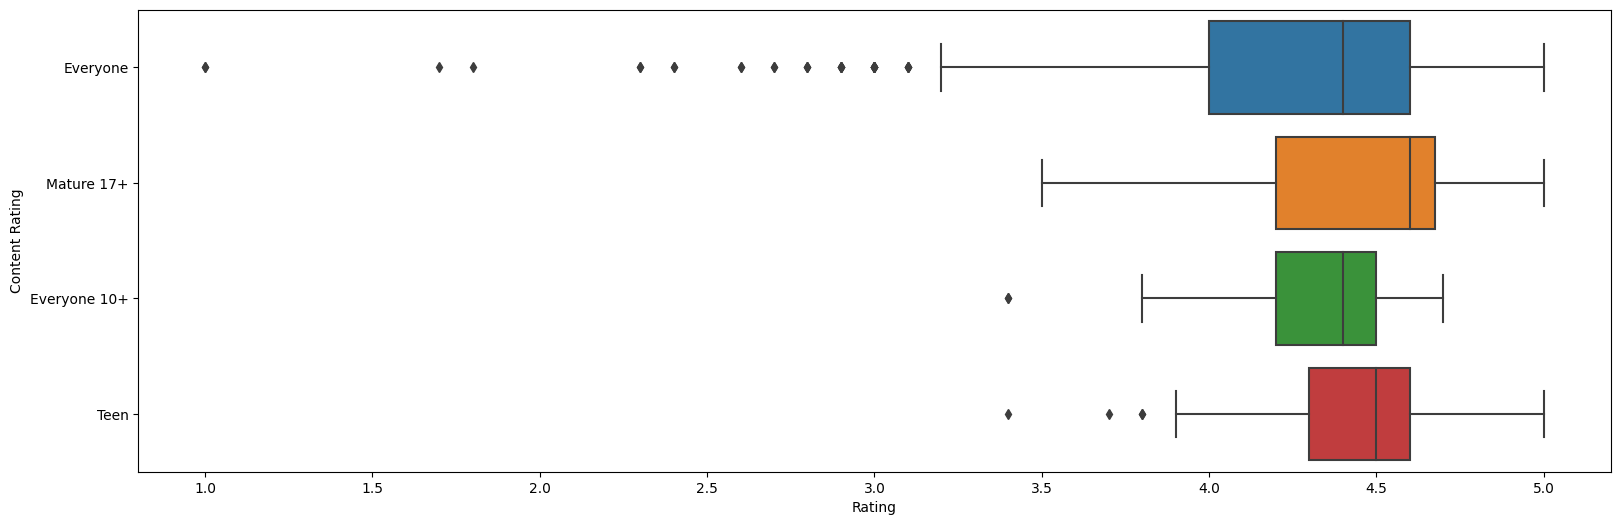

In [489]:
fix = plt.figure(figsize=(19,6))
sns.boxplot(data=df_full.loc[df_full['Price'] > 0], y='Content Rating', x='Rating')

### <b>5. Are all applications correctly maintened?</b>
- We can see that some applications are no longer maintained

<AxesSubplot: xlabel='Last Updated Year', ylabel='Count of apps'>

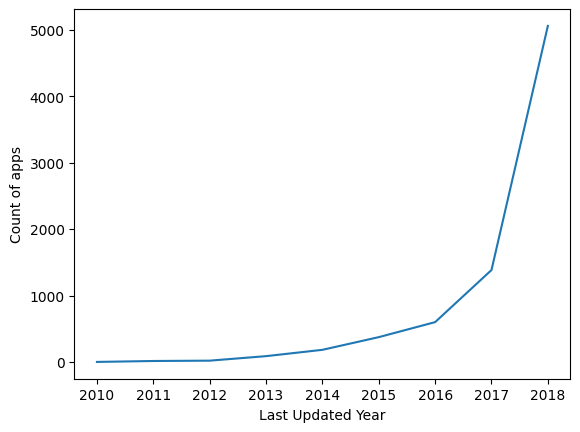

In [490]:
# first of all, let's create new column with year
df_full['Last Updated Year'] = pd.to_datetime(df_full['Last Updated']).dt.year
df_five = df_full.groupby('Last Updated Year').App.count().reset_index(name='Count of apps')
sns.lineplot(data=df_five, x='Last Updated Year', y='Count of apps')

### <b>6. How are the apps mostly rated, free/paid?</b>
- It's obvious, that there is more free apps 
- Apps are mostly rated from 4.0 to 4.8 points

<AxesSubplot: xlabel='Rating', ylabel='Count'>

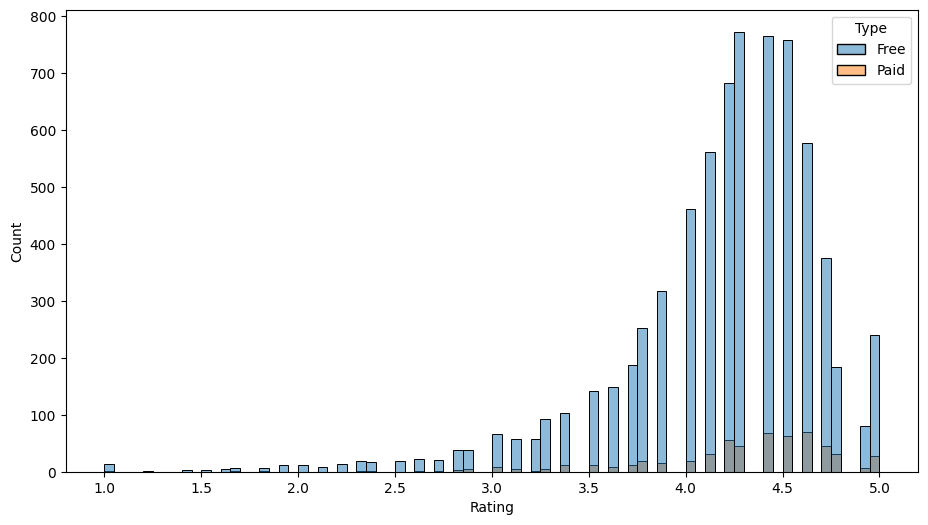

In [491]:
fig = plt.figure(figsize=((11,6)))
sns.histplot(data=df_full, x='Rating', hue='Type')

### <b>7. Relation between category and price</b>
- From commented row we know that the most expensive apps are in category finance and lifestyle
- I've filtered these extreme values for better visualisation
- Now we can see prices for each category
    - Medical apps has the most expensive app after filtering
    - Typical price is between 2 and 5 dollars

<AxesSubplot: xlabel='Price', ylabel='Category'>

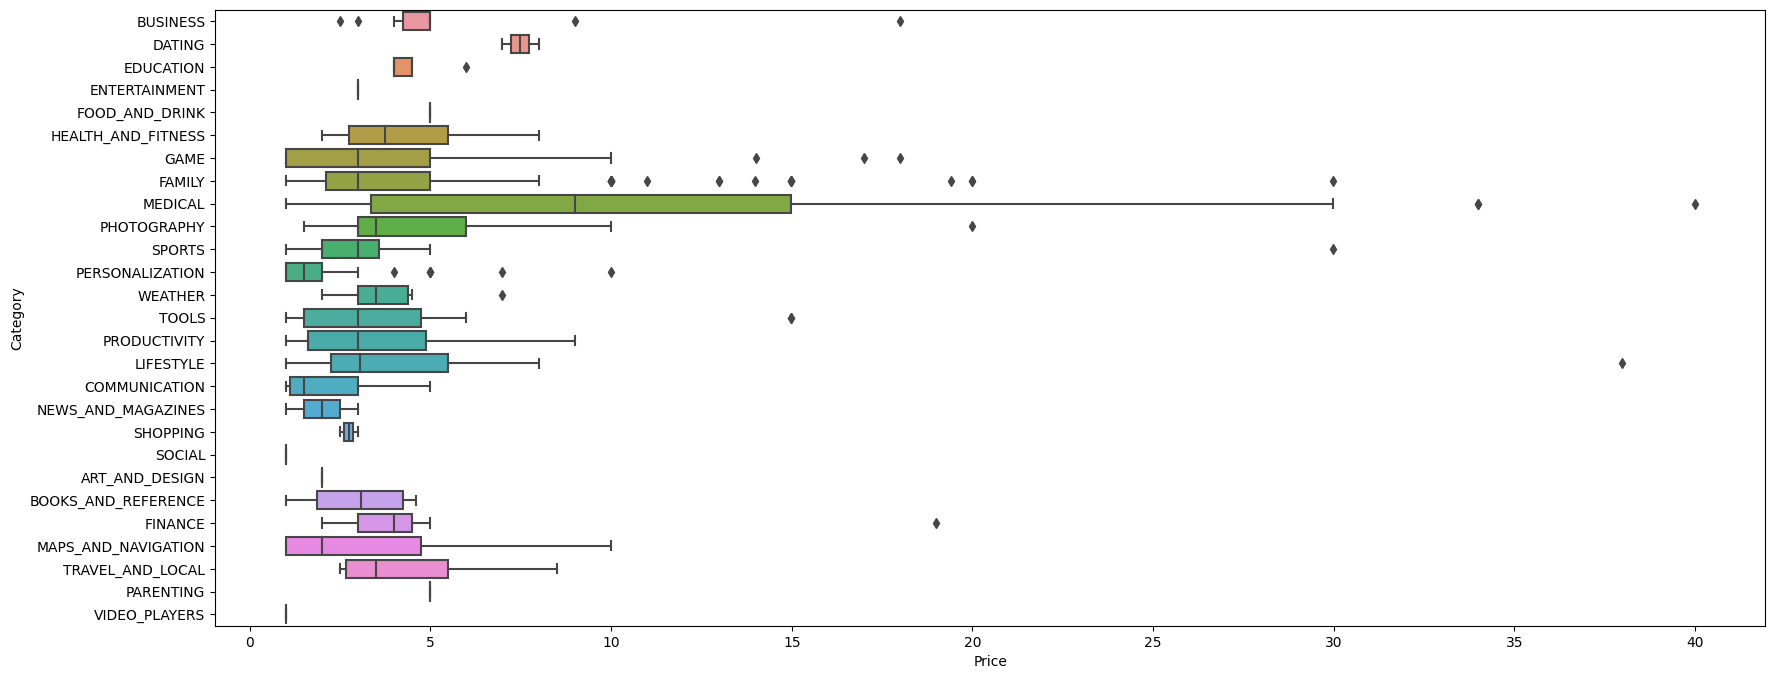

In [507]:
plt.figure(figsize=(20, 8))
# sns.barplot(data=df_full.loc[(df_full['Price'] > 0) ],y='Category', x='Price')
sns.boxplot(data=df_full.loc[(df_full['Price'] > 0) & (df_full['Price'] < 50)], y='Category', x='Price')

### <b>8. Let's check correlation between numeric values</b>
- We can see that correlation between selected values is not that strong, the exception is a couple of attributes
- Highest correlation is between Installs and Reviews, it means that more installed apps have higher number of reviews
- Second highest correlation is between min supported Android Version and Last Updated Year
- Third one is between Last Supported Year and Size of app, it does make sence for me, apps are bigger and bigger now, size of storage isn't problem these days

<AxesSubplot: >

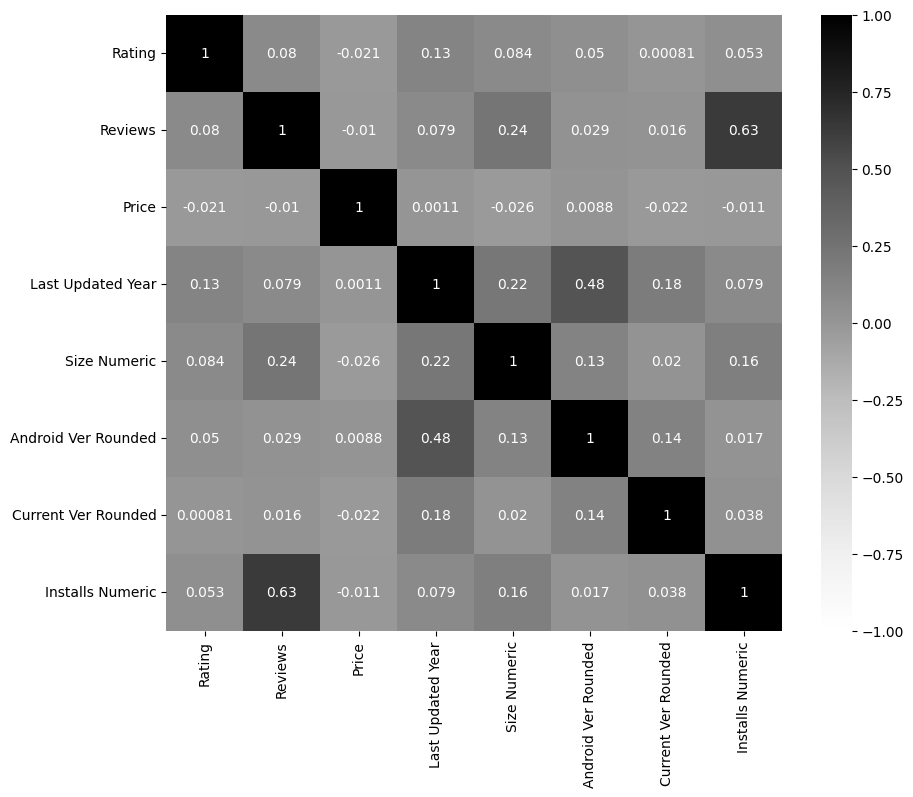

In [493]:
plt.figure(figsize=(10, 8))
df_numeric = df_full[['Rating', 'Reviews', 'Price', 'Last Updated Year', 'Size Numeric', 'Android Ver Rounded', 'Current Ver Rounded', 'Installs Numeric']]
sns.heatmap(df_numeric.corr(), square=True, cmap='Greys', vmin=-1, vmax=1, annot=True)

### <b>9. Does Category affects app size?</b>
- As I've expected, games are the biggest one

<AxesSubplot: xlabel='Size Numeric', ylabel='Category'>

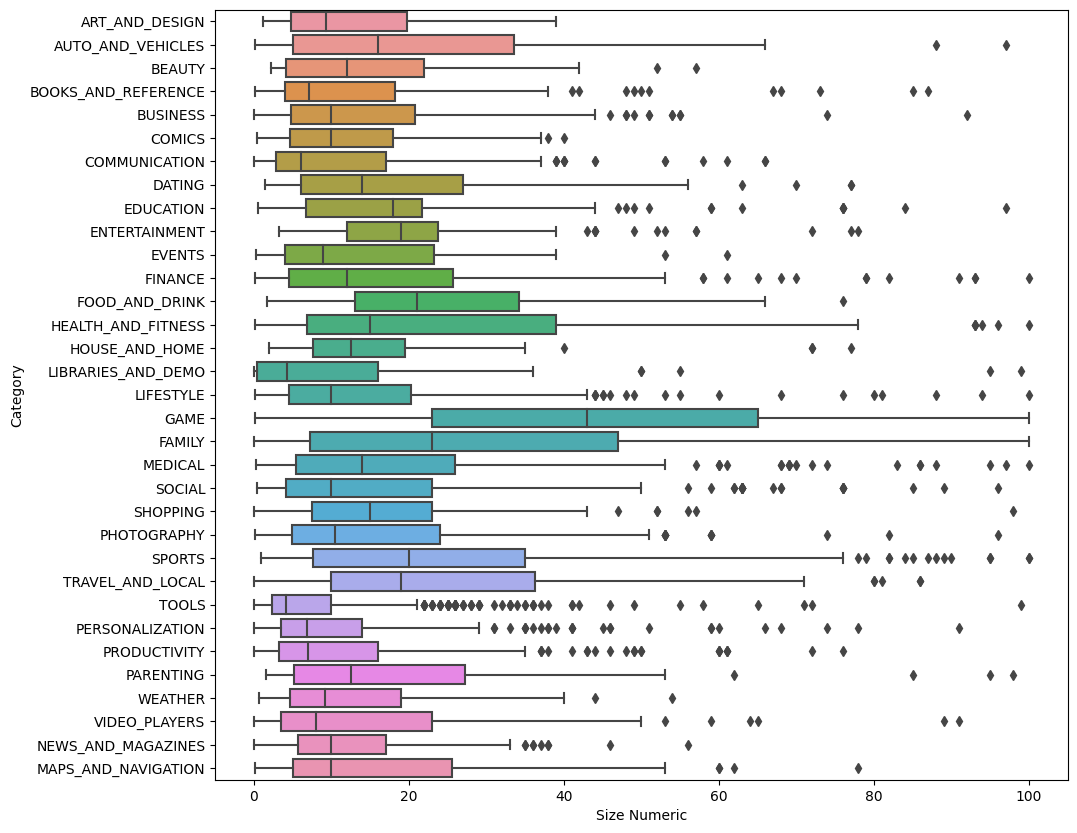

In [494]:
fig = plt.figure(figsize=((11,10)))
sns.boxplot(data=df_full, y='Category', x='Size Numeric')

### <b>10. Relation between Rating and number of Reviews</b>
- As we can see on lineplot, apps with rating around 4.5 have the highest number of reviews
    - It's because frequency of rating is the highest around 4.5, as we can see there is the highest variance
    - I think this is due to the fact that the user who writes the review also gives a rating

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

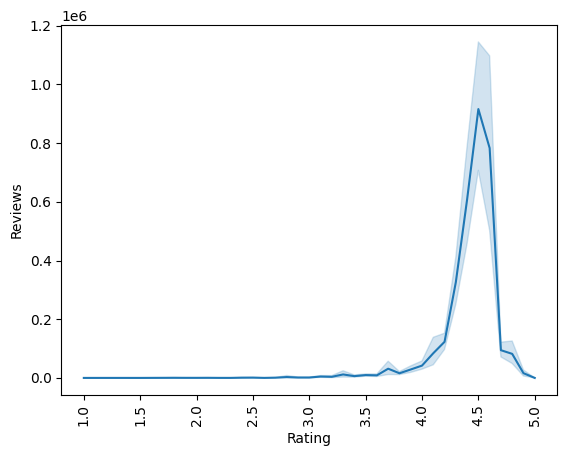

In [495]:
plt.xticks(rotation=90)
sns.lineplot(data=df_full, x='Rating', y='Reviews')

### <b>11. Relation between Category and Content Rating</b>
- We can see that apps with family theme are for everyone, age doesn't matter
- When we look at game category, we can see that focus group is Teens, which makes sence, but Everyone too
- Strong correlation is between Tools category and Everyone, yes, tools are for everyone, age doesn't matter

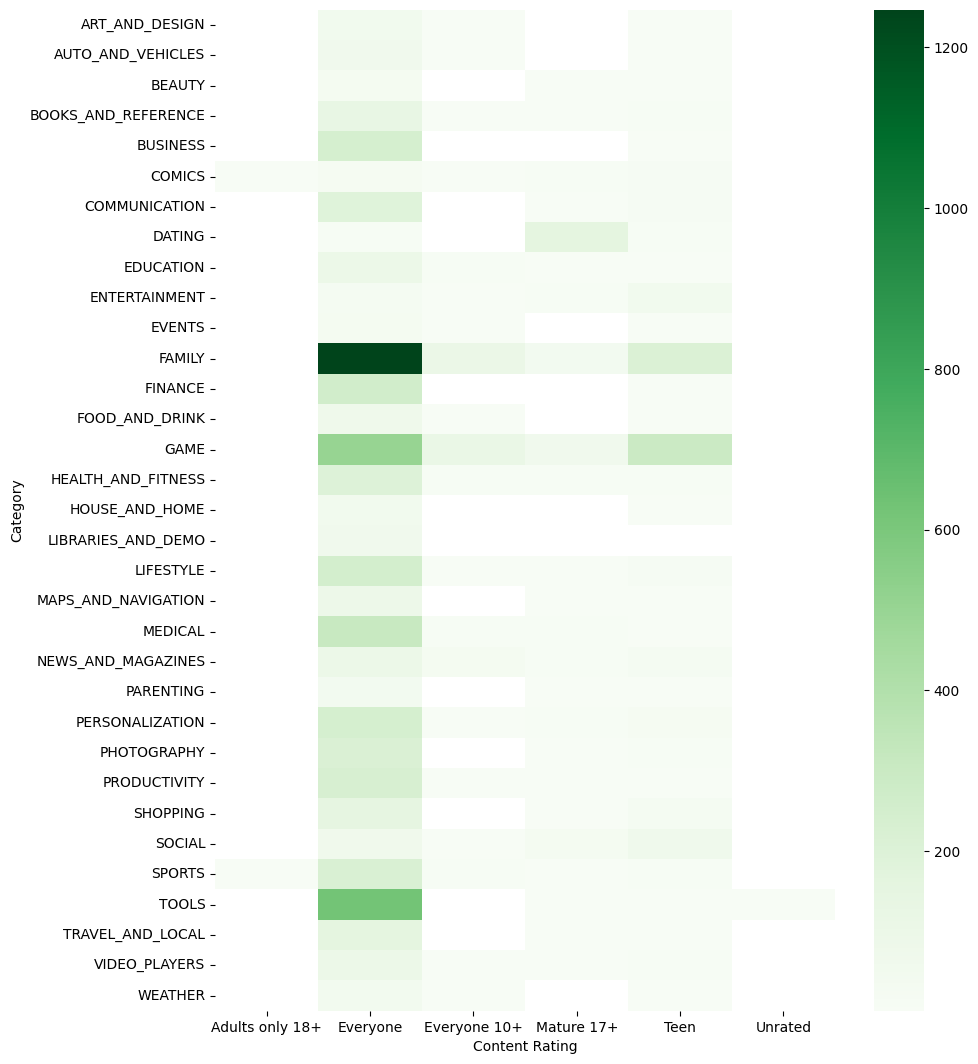

In [496]:
df_eleven = df_full.groupby(['Category', 'Content Rating']).App.count().reset_index(name='count')

plt.figure(figsize=(10, 13))
sns.heatmap(data=df_eleven.pivot(index='Category', columns='Content Rating', values='count'), cmap='Greens')
plt.show()

### <b>12. Relation between min supported version and last updated year</b>
- We can see that apps which are regularly updated increasing minimum supported version
- Apps which are not updated that regularly have higher variance of version

<AxesSubplot: xlabel='Last Updated Year', ylabel='Android Ver Rounded'>

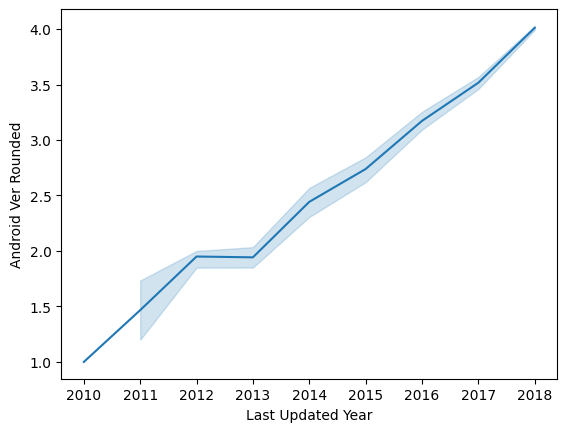

In [497]:
sns.lineplot(data=df_full.loc[df_full['Android Ver Rounded'] > 0], y='Android Ver Rounded', x='Last Updated Year')

### <b>13. Does have minimum supported os version affects size of app?</b>
- It seems that apps which are supports new os versions only are bigger
    - I've expected bigger differences, it seems that os version 5 was the turning point

<AxesSubplot: xlabel='Android Ver Rounded', ylabel='Size Numeric'>

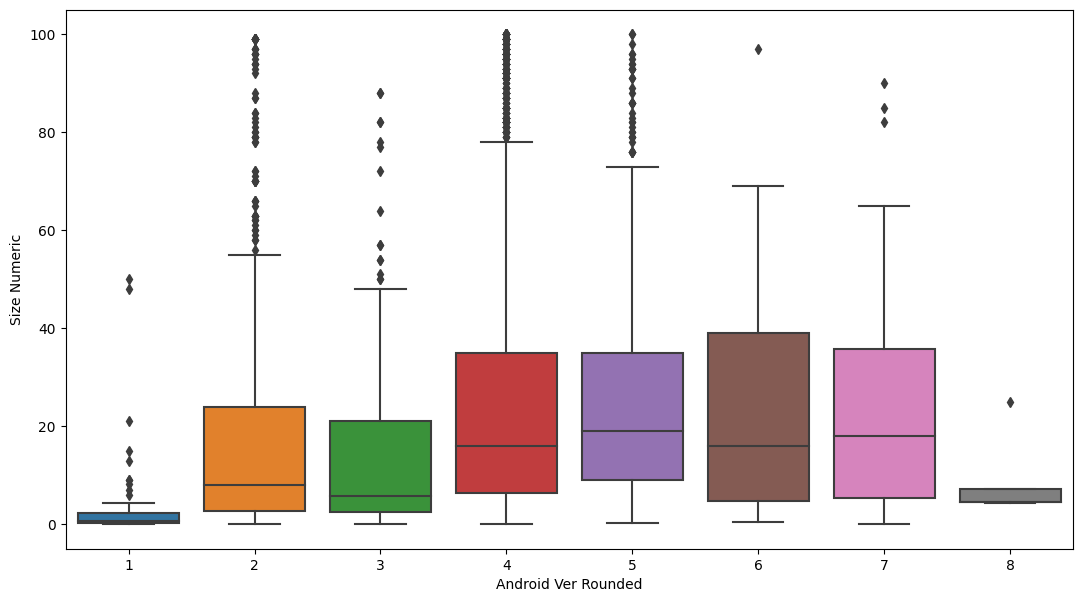

In [498]:
plt.figure(figsize=(13, 7))
sns.boxplot(data=df_full.loc[df_full['Android Ver Rounded'] > 0], x='Android Ver Rounded', y='Size Numeric')

### <b>14. Relation between current version of app and rating</b>
- It seems that freshly released apps have some bad ratings
- But apps with older version are rated higher, bug fixing etc.


<AxesSubplot: xlabel='Current Ver Rounded', ylabel='Rating'>

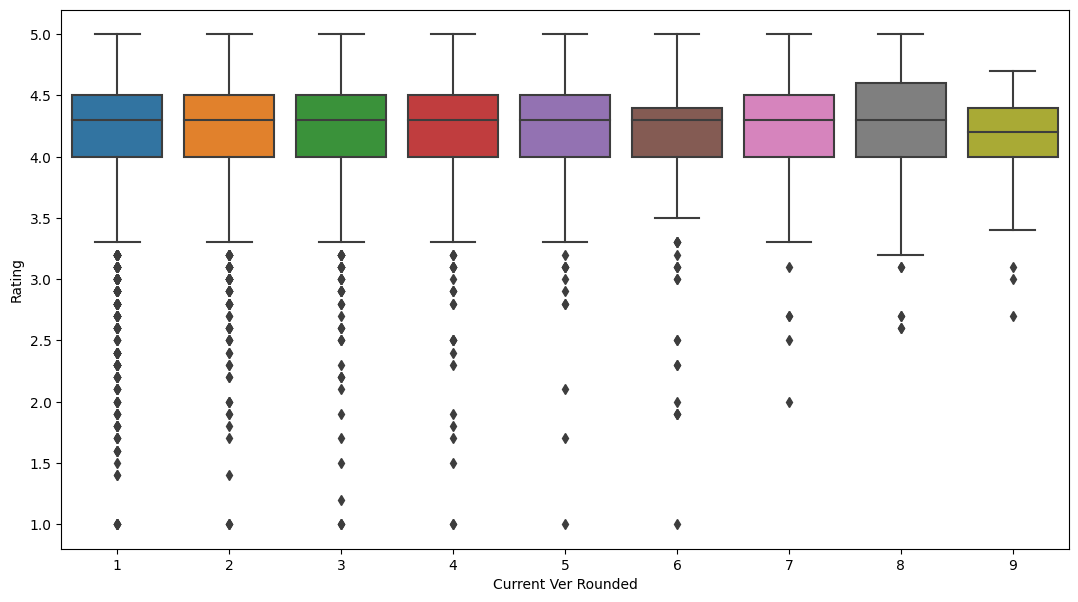

In [499]:
plt.figure(figsize=(13, 7))
sns.boxplot(data=df_full.loc[df_full['Current Ver Rounded'] > 0], y='Rating', x='Current Ver Rounded')

### <b>15. Relation between Installs and Rating</b>
- The most installed apps have higher rating
- But there could be some fluctuations as we can see
    - The statement that more installed apps have better rating doesn't have to be true

<AxesSubplot: xlabel='Rating', ylabel='Installs Numeric'>

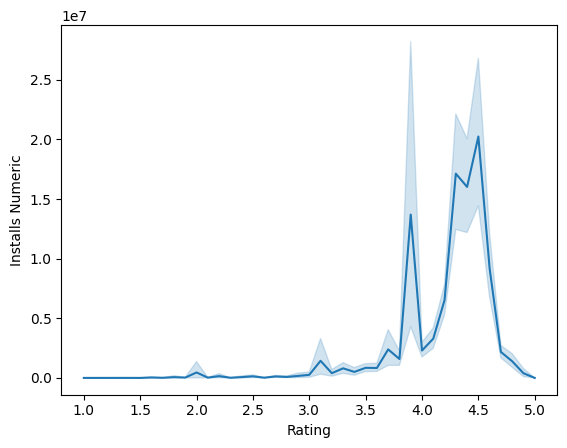

In [500]:
sns.lineplot(data=df_full, y='Installs Numeric', x='Rating')

### <b>16. Relation between Reviews and Installs</b>
- As the heatmap indicated a correlation between Reviews and Installs, higher number of installs means higher number of reviews
- But more installs means higher variance in data

<AxesSubplot: xlabel='Installs Numeric', ylabel='Reviews'>

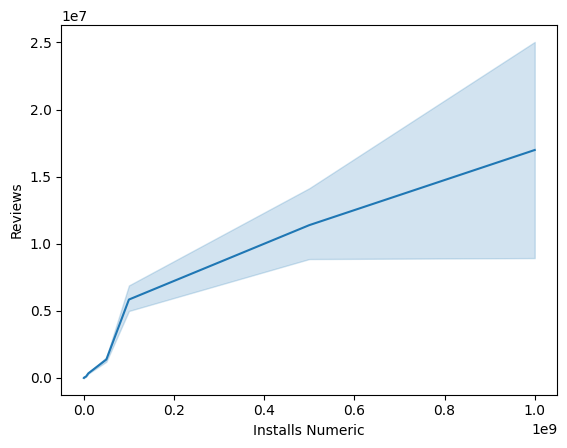

In [501]:
sns.lineplot(data=df_full, x='Installs Numeric', y='Reviews')

### <b>17. Let's check some man/mix values</b>

In [533]:
print("The most expansive: " + df_full.loc[df_full['Price'].idxmax()]['App'])
print("The most cheapest: " + df_full.loc[df_full['Price'].idxmin()]['App'])
print("App with the highest number of reviews: " + df_full.loc[df_full['Reviews'].idxmax()]['App'])
print("App with the lower number of reviews: " + df_full.loc[df_full['Reviews'].idxmin()]['App'])
print("App with the biggest size: " + df_full.loc[df_full['Size Numeric'].idxmax()]['App'])
print("App with the best rating: " + df_full.loc[df_full['Rating'].idxmax()]['App'])
print("App with the worst rating: " + df_full.loc[df_full['Rating'].idxmin()]['App'])

The most expansive: I'm Rich - Trump Edition
The most cheapest: Photo Editor & Candy Camera & Grid & ScrapBook
App with the highest number of reviews: Clash of Clans
App with the lower number of reviews: House party - live chat
App with the biggest size: Post Bank
App with the best rating: Hojiboy Tojiboyev Life Hacks
App with the worst rating: House party - live chat


## Final report
- A dataset analysis was performed on android <b>apps</b> available through <b>Google Play</b>.
- Exploratory data analysis revealed the following findings:
    - Most apps are in the <b>family</b> category, with <b>games</b> coming in second
    - Most apps do not have a specified target group (age), but the highest count of apps targeted on <b>Teens</b>
    - Most apps exceed <b>1,000,000 installs</b>, but for example 1 000 000 000 installs exeed only few apps
    - The highest rated apps are for the <b>mature 17+</b> target group
    - About <b>half</b> of the applications are correctly maintained
    - Applications are most often rated <b>between 4 and 5 points</b>
    - The most expansive apps is in the category <b>Finance</b>, second one in <b>Lifestyle</b>
    - Most paid apps cost <b>up to 5 dollars</b>
    - Apps in the category <b>Medical</b> are <b>the most expansive one</b>
    - You will need the most <b>storage space</b> for apps in the <b>games</b> category
    - If the user <b>rates well</b> an app, they usually write a <b>review</b>
    - Apps in the family category usually <b>do not have a target group</b>, they are simply <b>for every age</b>
    - Applications that are <b>frequently updated</b> have a <b>higher operating system version requirement</b>
    - Applications that have higher conditions on the minimum version of the system gain a little in size
    - Apps that are in their <b>first version (newly released)</b> tend to have <b>worse ratings</b>
    - As is logically predictable, a <b>higher number of installs</b> means <b>more app ratings</b>
    - Applications with <b>minimum/maximum</b> for selected attributes
        - The most expansive: <b>I'm Rich - Trump Edition</b>
        - The most cheapest: <b>Photo Editor & Candy Camera & Grid & ScrapBook</b>
        - App with the highest number of reviews: <b>Clash of Clans</b>
        - App with the lower number of reviews: <b>House party - live chat</b>
        - App with the biggest size: <b>Post Bank</b>
        - App with the best rating: <b>Hojiboy Tojiboyev Life Hacks</b>
        - App with the worst rating: <b>House party - live chat</b>

